In [1]:
import sys
!conda install --yes --prefix {sys.prefix} statsmodels

Solving environment: done

# All requested packages already installed.



In [2]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


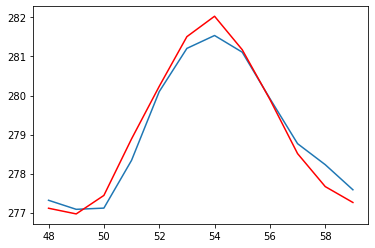

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=277.134087, expected=277.316750


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=276.842223, expected=277.085131


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=277.479170, expected=277.116318


In [ ]:
def ar_model(train_data, test_data):
    model = AutoReg(train_data.tas_avg, lags=10)
    model_fit = model.fit()
    # make prediction
    pred = model_fit.predict(len(train_data), len(test_data) + len(train_data) - 1, dynamic=False)
    plt.plot(test_data.tas_avg)
    plt.plot(pred, color='red')
    plt.show()


def arima_model(train_data, test_data):
    history = [x for x in train_data.tas_avg]
    tst = [y for y in test_data.tas_avg]
    predictions = list()
    for i in range(len(tst)):
        model = ARIMA(history, order=(20, 0, 0))
        model_fit = model.fit()
        output = model_fit.forecast()
        pred = output[0]
        predictions.append(pred)
        true = tst[i]
        history.append(true)
        print('predicted=%f, expected=%f' % (pred, true))
    plt.plot(tst)
    plt.plot(predictions, color='red')
    plt.show()


def sarima_model(train_data, test_data):
    history = [x for x in train_data.tas_avg]
    tst = [y for y in test_data.tas_avg]
    predictions = list()
    for i in range(len(tst)):
        model = SARIMAX(history, seasonal_order=(3, 1, 0, 12))
        model_fit = model.fit()
        output = model_fit.forecast()
        pred = output[0]
        predictions.append(pred)
        true = tst[i]
        history.append(true)
        print('predicted=%f, expected=%f' % (pred, true))
    plt.plot(tst)
    plt.plot(predictions, color='red')
    plt.show()


data = pd.read_csv('masterData/master_averages_df.csv', index_col=0)
train, test = np.split(data, [int(.8 * len(data))])
ar_model(train, test)
arima_model(train, test)
sarima_model(train, test)


